In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import joblib
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_accuracy_comparison(accuracy_values, model_names):
    fig, ax = plt.subplots()
    bar_width = 0.2
    x_pos = np.arange(len(model_names))

    rects = ax.bar(x_pos, accuracy_values, bar_width, alpha=0.8)

    ax.set_xticks(x_pos)
    ax.set_xticklabels(model_names)
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy Comparison')

    # Add labels on top of each bar
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f"{round(height, 2)}", xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

    # Show the plot
    plt.tight_layout()
    plt.show()


def plot_accuracy_comparison_train_test(train_accuracy, test_accuracy, model_name):
    fig, ax = plt.subplots()

    rects = ax.bar([0, 1], [train_accuracy, test_accuracy], alpha=0.8)

    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Train Accuracy', 'Test Accuracy'])
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Train and Test Accuracy Comparison for {model_name}')

    # Add labels on top of each bar
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f"{round(height, 2)}", xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

    # Show the plot
    plt.tight_layout()
    plt.show()





In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_classification_metrics(classification_report_result, model_name):
    precision = []
    recall = []
    f1_score = []
    support = []
    target_classes = []
    lines = classification_report_result.split('\n')
    for line in lines[2:-5]:
        row_data = line.split()
        target_classes.append(row_data[0])
        precision.append(float(row_data[1]))
        recall.append(float(row_data[2]))
        f1_score.append(float(row_data[3]))
        support.append(int(row_data[4]))

    # Set the width for each bar
    bar_width = 0.2

    # Set the positions for the bars
    x_pos = np.arange(len(target_classes))

    # Create a figure and axes for the bar graph
    fig, ax = plt.subplots(figsize=(18, 9))

    # Plot the bars for precision, recall, and F1-score
    rects1 = ax.bar(x_pos, precision, bar_width, alpha=0.4, label='Precision')
    rects2 = ax.bar(x_pos + bar_width, recall, bar_width, alpha=0.6, label='Recall')
    rects3 = ax.bar(x_pos + 2*bar_width, f1_score, bar_width, alpha=0.8, label='F1-score')

    # Set the x-axis labels
    ax.set_xticks(x_pos + bar_width)
    ax.set_xticklabels(target_classes, rotation=90)
    ax.set_xlabel('Attack Categories')

    # Set the y-axis label
    ax.set_ylabel('Scores')

    # Set the title
    ax.set_title(f'{model_name} on CICIOT2023')

    # Add a legend
    ax.legend()

    # Add labels on top of each bar
    for rects in [rects1, rects2, rects3]:
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f"{height:.2f}", xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    # Show the plot
    plt.tight_layout()
    plt.show()


In [5]:
def train_model(model, X_train, y_train, X_test, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the train set
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_confusion_matrix_result = confusion_matrix(y_train, y_train_pred)
    train_classification_report_result = classification_report(y_train, y_train_pred)

    # Predict on the test set
    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    confusion_matrix_result = confusion_matrix(y_test, y_test_pred)
    classification_report_result = classification_report(y_test, y_test_pred)

    # Save the trained model
    joblib.dump(model, f'E:/NITW/Project/MODELS/ML/{model_name}_CICIOT2023.pkl')

    # Create a bar graph
    plot_accuracy_comparison_train_test(train_accuracy, accuracy, model_name)

    # Return classification reports and accuracies
    return {
        'train_classification_report': train_classification_report_result,
        'test_classification_report': classification_report_result,
        'train_accuracy': train_accuracy,
        'test_accuracy': accuracy
    }

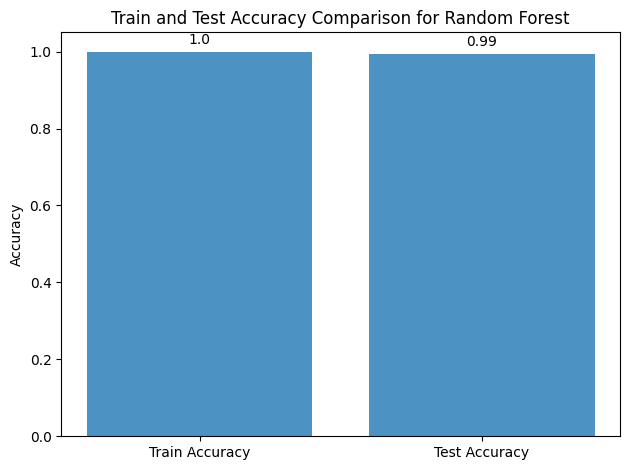

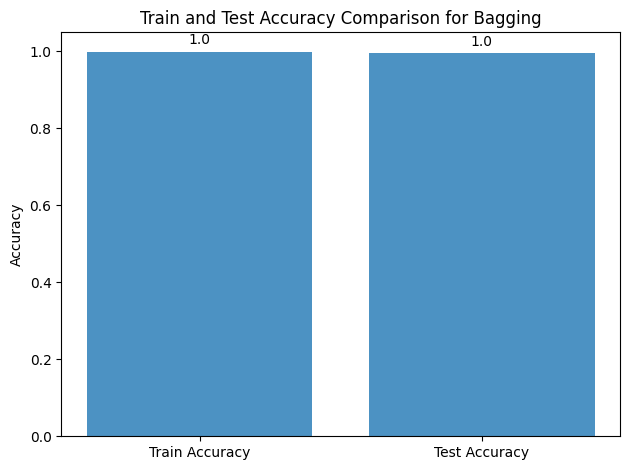

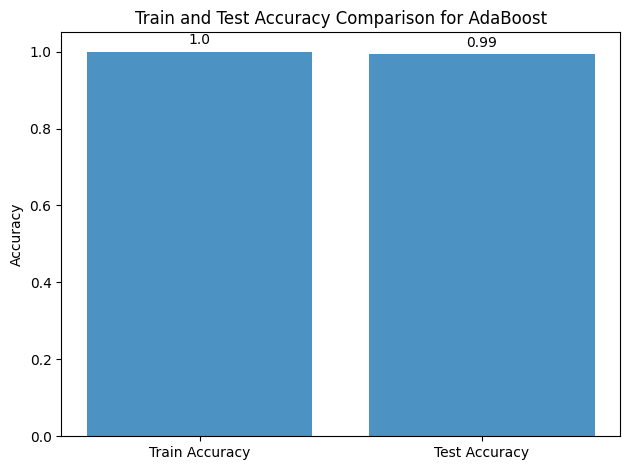

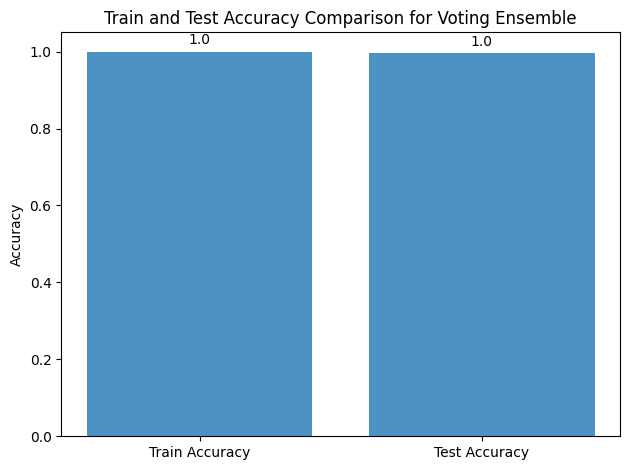

In [6]:
# Load the dataset
data = pd.read_csv('E:/NITW/Project/Datasets/CICIOT2023_EXTRACTED/train_data.csv')
data1 = pd.read_csv('E:/NITW/Project/Datasets/CICIOT2023_EXTRACTED/test_data.csv')

data.dropna(inplace=True)
X_train = data.drop(['label'], axis=1)
y_train = data['label']
data1.dropna(inplace=True)
X_test = data1.drop(['label'], axis=1)
y_test = data1['label']

# Split the data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
random_forest = RandomForestClassifier()
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)
voting_ensemble = VotingClassifier(estimators=[('RF', random_forest), ('bag', bagging), ('ada', adaboost)])

# Train and evaluate each model
rf_results = train_model(random_forest, X_train, y_train, X_test, y_test, "Random Forest")
bagging_results = train_model(bagging, X_train, y_train, X_test, y_test, "Bagging")
adaboost_results = train_model(adaboost, X_train, y_train, X_test, y_test, "AdaBoost")
voting_results = train_model(voting_ensemble, X_train, y_train, X_test, y_test, "Voting Ensemble")




In [7]:
# Access the results
print("Random Forest - Training Set Accuracy:", rf_results['train_accuracy'])
print("Random Forest - Testing Set Accuracy:", rf_results['test_accuracy'])
print("Random Forest - Training Set Classification Report:")
print(rf_results['train_classification_report'])
print("Random Forest - Testing Set Classification Report:")
print(rf_results['test_classification_report'])

Random Forest - Training Set Accuracy: 0.999999122944423
Random Forest - Testing Set Accuracy: 0.9947013026134947
Random Forest - Training Set Classification Report:
                         precision    recall  f1-score   support

       Backdoor_Malware       1.00      1.00      1.00       432
          BenignTraffic       1.00      1.00      1.00    134064
       BrowserHijacking       1.00      1.00      1.00       712
       CommandInjection       1.00      1.00      1.00       665
 DDoS-ACK_Fragmentation       1.00      1.00      1.00     34835
        DDoS-HTTP_Flood       1.00      1.00      1.00      3588
        DDoS-ICMP_Flood       1.00      1.00      1.00    879108
DDoS-ICMP_Fragmentation       1.00      1.00      1.00     55449
      DDoS-PSHACK_Flood       1.00      1.00      1.00    500985
       DDoS-RSTFINFlood       1.00      1.00      1.00    493744
         DDoS-SYN_Flood       1.00      1.00      1.00    497294
         DDoS-SlowLoris       1.00      1.00      1.0

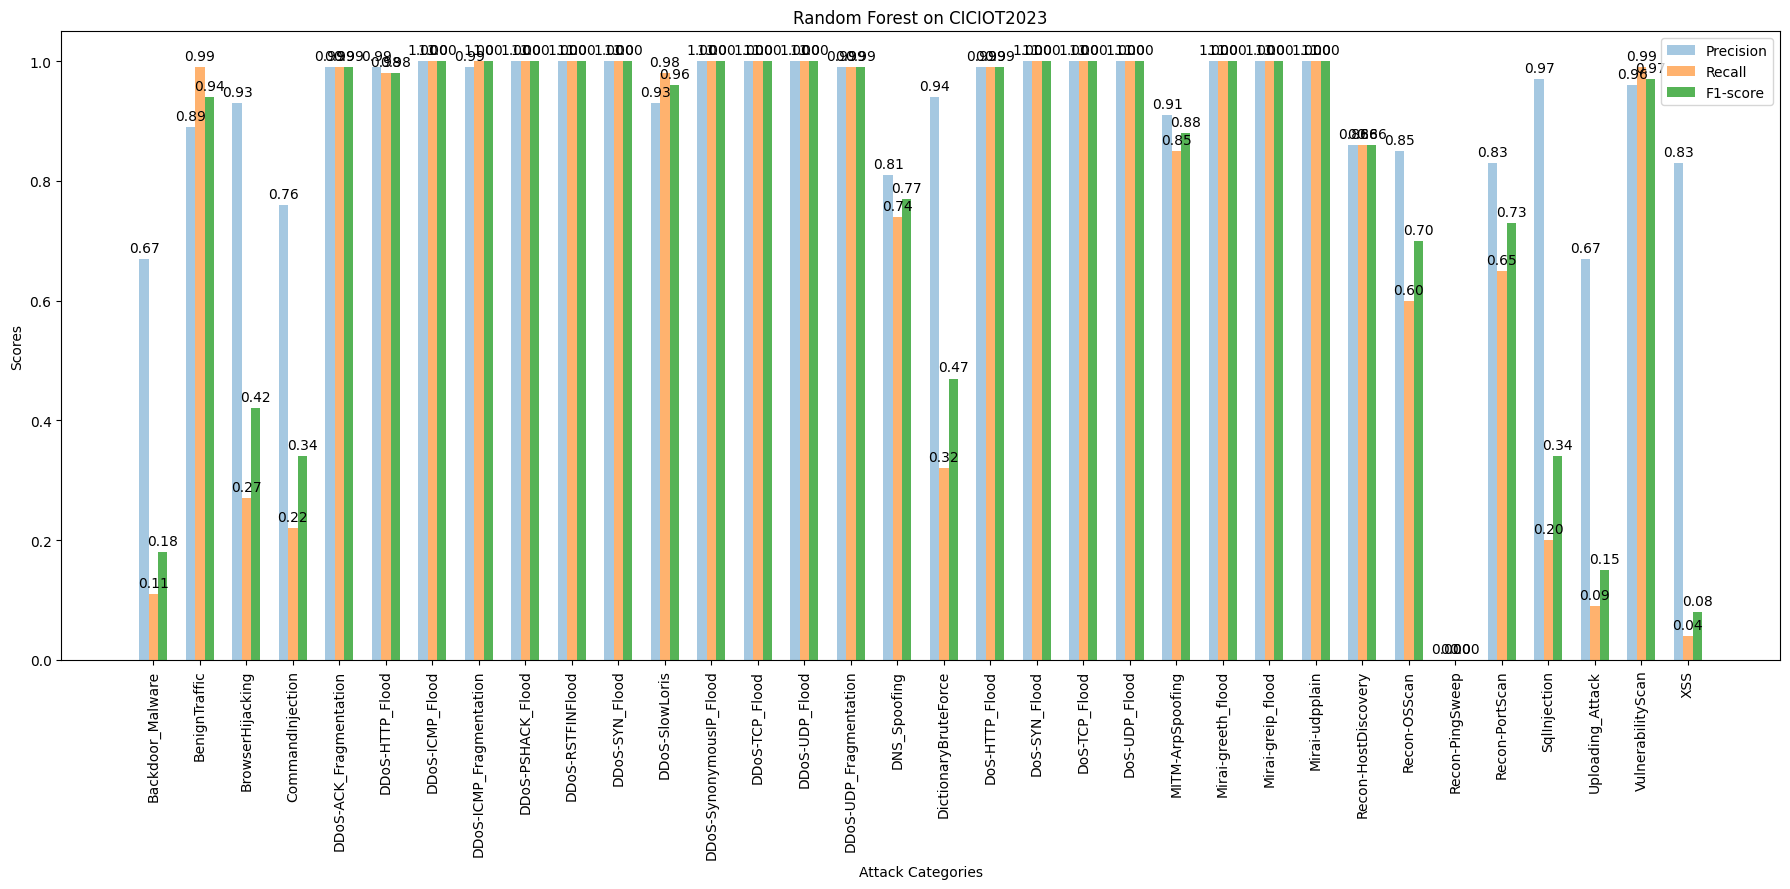

In [10]:
# Access the classification report from rf_results
rf_classification_report = rf_results['test_classification_report']

# Call the plot_classification_metrics function with the classification report
plot_classification_metrics(rf_classification_report, "Random Forest")


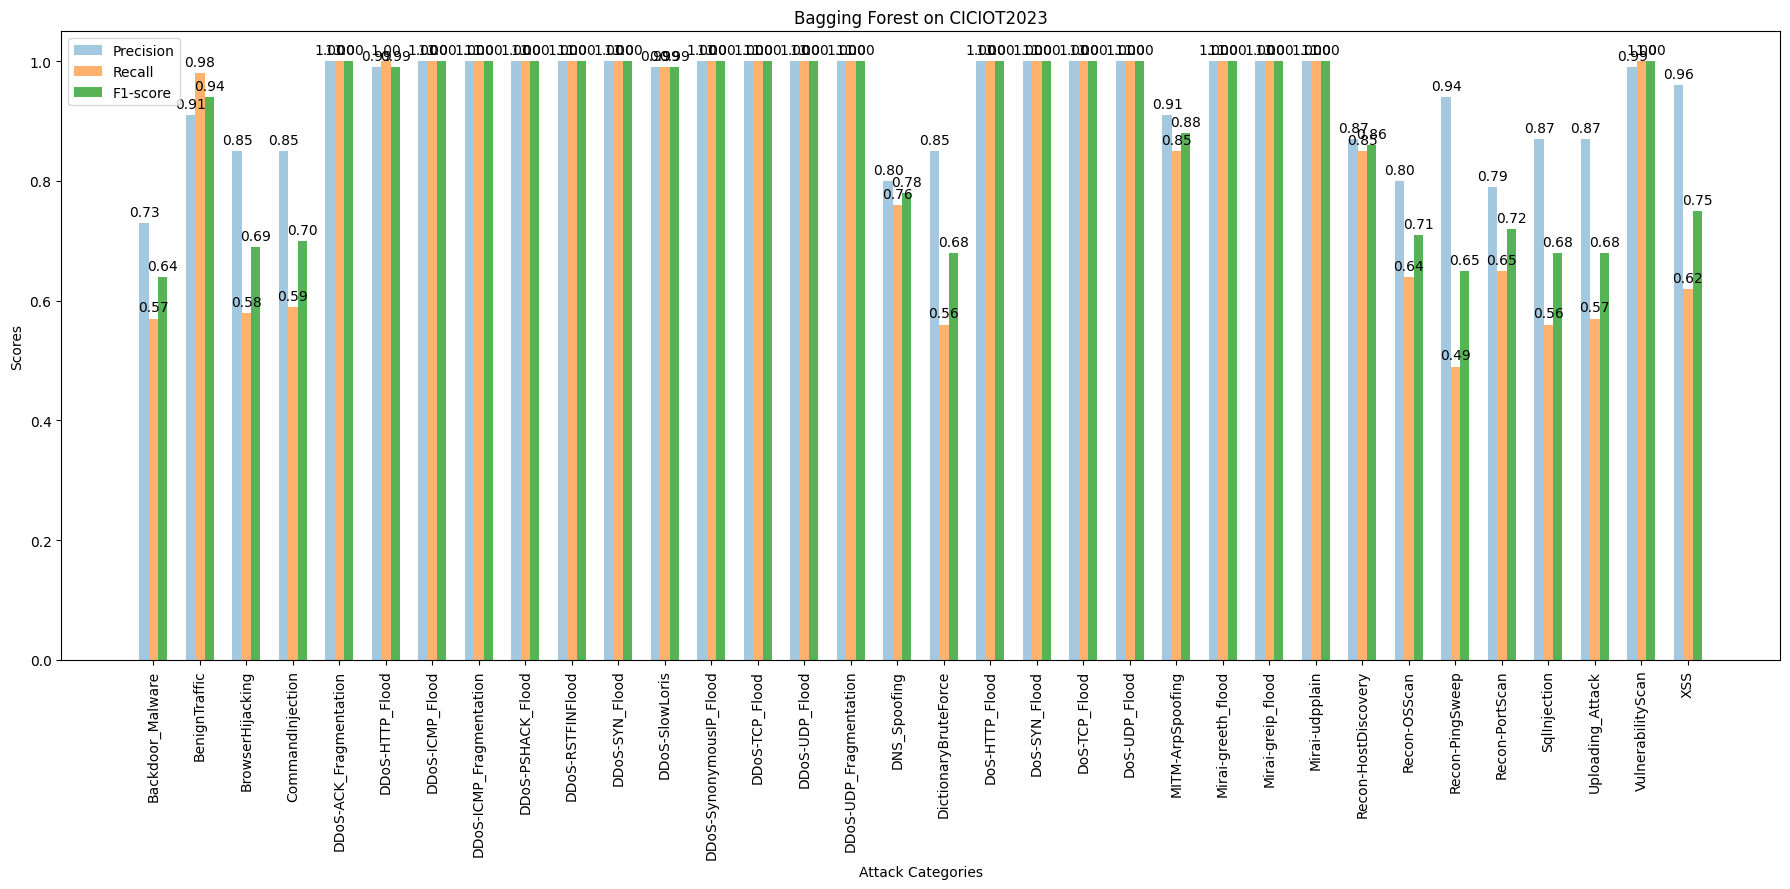

In [11]:
# Access the classification report from rf_results
bagging_classification_report = bagging_results['test_classification_report']

# Call the plot_classification_metrics function with the classification report
plot_classification_metrics(bagging_classification_report, "Bagging Forest")


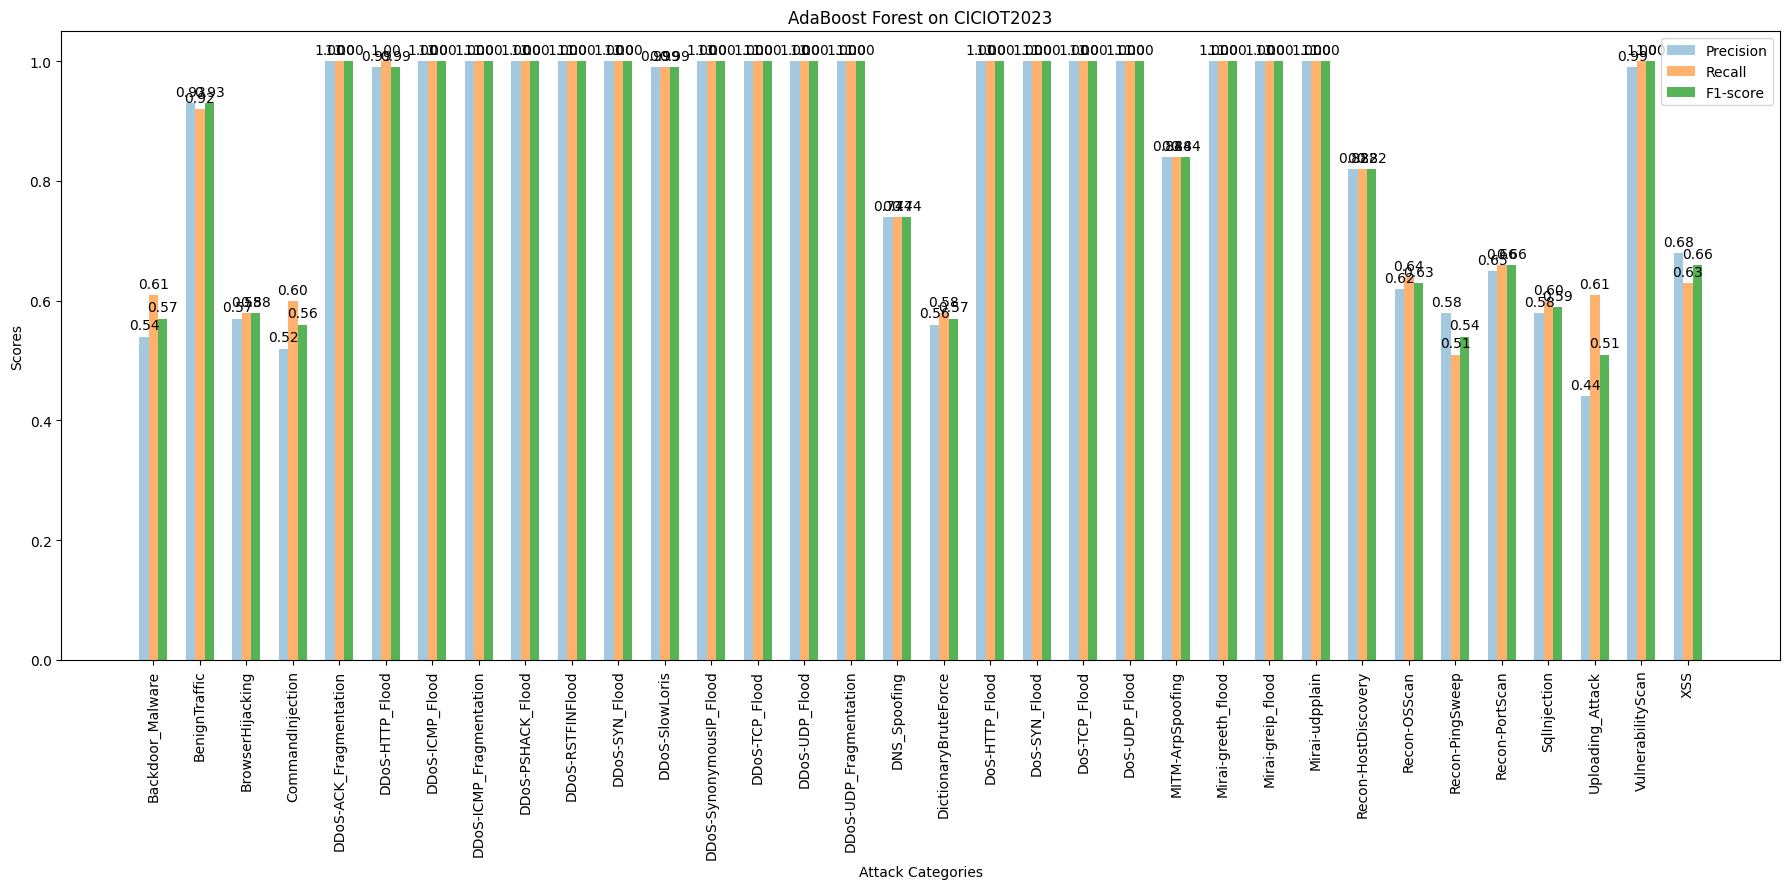

In [12]:
# Access the classification report from rf_results
adaboost_classification_report = adaboost_results['test_classification_report']

# Call the plot_classification_metrics function with the classification report
plot_classification_metrics(adaboost_classification_report, "AdaBoost Forest")


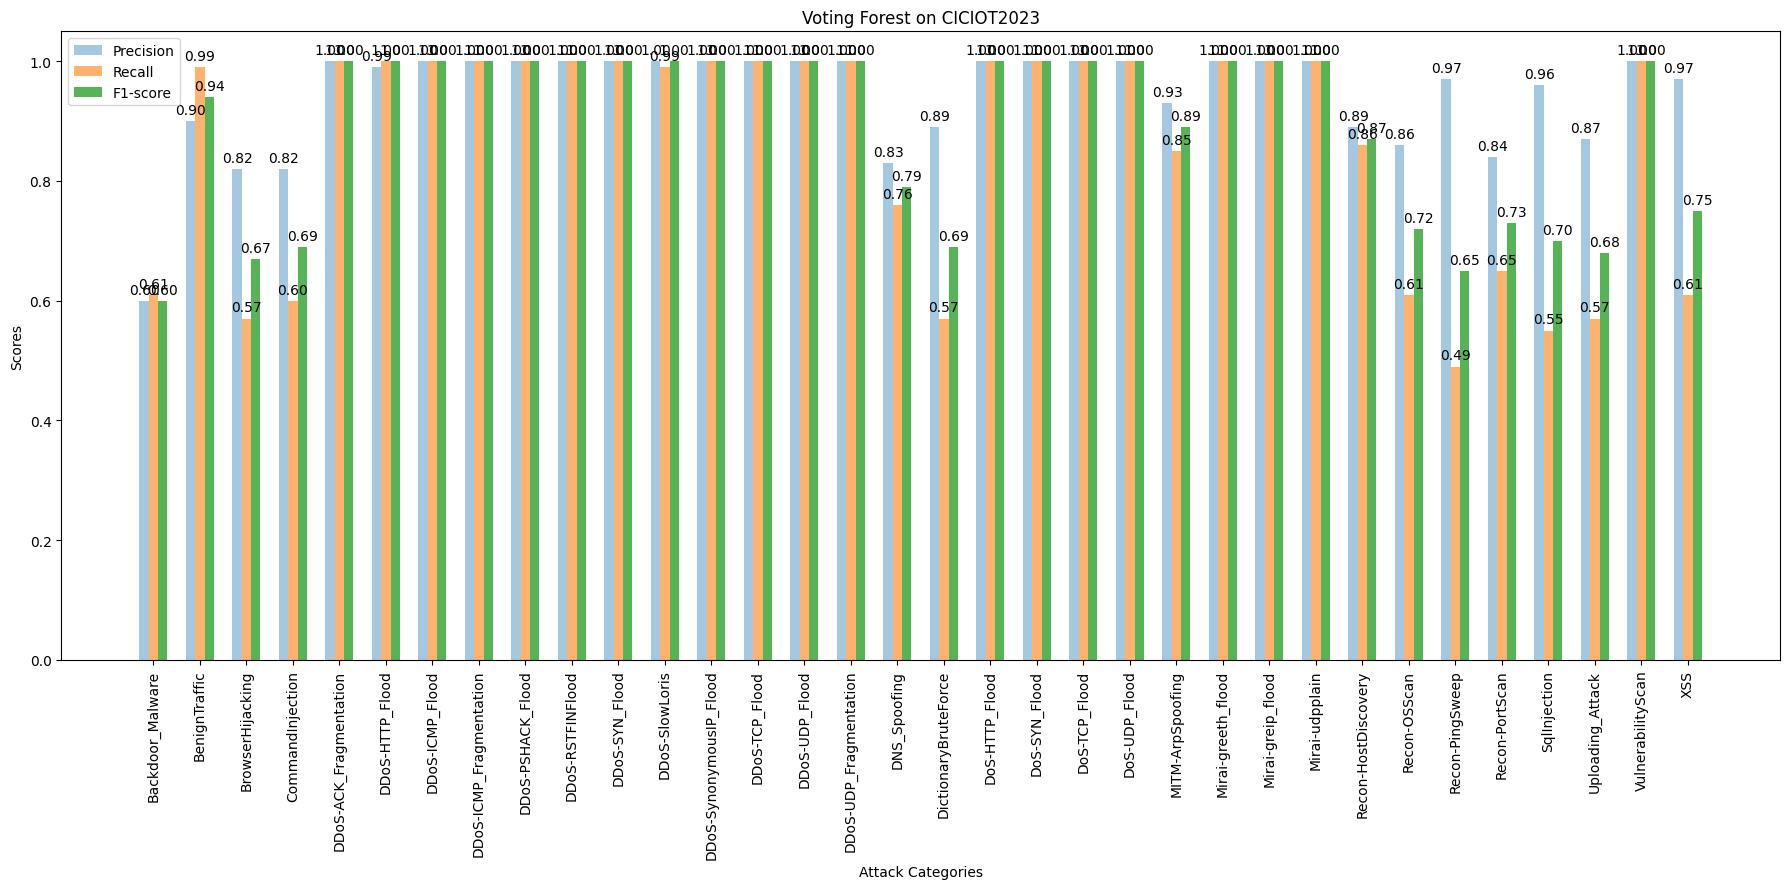

In [13]:
# Access the classification report from rf_results
voting_classification_report = voting_results['test_classification_report']

# Call the plot_classification_metrics function with the classification report
plot_classification_metrics(voting_classification_report, "Voting Forest")


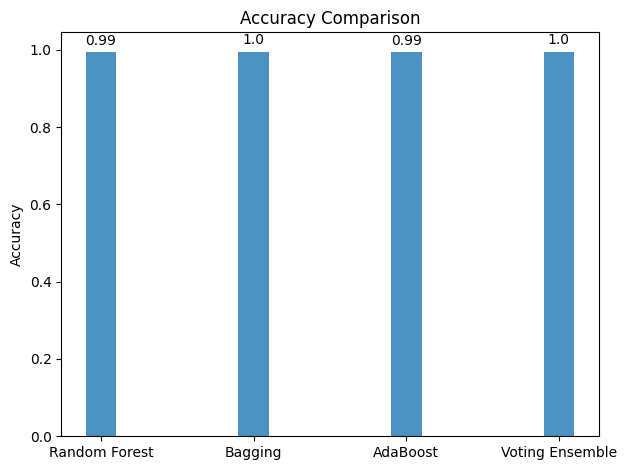

In [14]:
# Example usage for comparing accuracies of different models
accuracy_values = [rf_results['test_accuracy'], bagging_results['test_accuracy'], adaboost_results['test_accuracy'], voting_results['test_accuracy']]
model_names = ['Random Forest', 'Bagging', 'AdaBoost', 'Voting Ensemble']

plot_accuracy_comparison(accuracy_values, model_names)


